In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("ddaefda0913b36051550 (1).csv")
print("✅ Dataset loaded successfully.")

✅ Dataset loaded successfully.


In [3]:
#  Step 3: Preview Dataset
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [5]:
# Step 4: Basic Info
print("Shape:", df.shape)
df.info()

Shape: (111267, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111267 entries, 0 to 111266
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    111267 non-null  float64
 1   longitude   111267 non-null  float64
 2   brightness  111267 non-null  float64
 3   scan        111267 non-null  float64
 4   track       111267 non-null  float64
 5   acq_date    111267 non-null  object 
 6   acq_time    111267 non-null  int64  
 7   satellite   111267 non-null  object 
 8   instrument  111267 non-null  object 
 9   confidence  111267 non-null  int64  
 10  version     111267 non-null  float64
 11  bright_t31  111267 non-null  float64
 12  frp         111267 non-null  float64
 13  daynight    111267 non-null  object 
 14  type        111267 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 12.7+ MB


In [7]:
# Step 5: Missing Value Check
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [9]:
# Step 6: Statistical Summary
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,111267.000000,111267.000000,111267.000000,111267.000000,111267.000000,111267.000000,111267.000000,1.112670e+05,111267.000000,111267.000000,111267.000000
mean,24.283092,81.403069,324.826080,1.423418,1.152912,814.960213,64.405170,6.030000e+00,304.247883,29.073369,0.077894
std,4.734092,6.564684,14.780342,0.638741,0.203361,342.842002,18.352227,1.660279e-11,8.439882,87.436113,0.387391
min,8.136200,68.529500,300.000000,1.000000,1.000000,334.000000,0.000000,6.030000e+00,267.200000,0.000000,0.000000
25%,21.291350,76.005350,315.400000,1.000000,1.000000,650.000000,54.000000,6.030000e+00,298.900000,9.100000,0.000000
50%,24.009000,79.450000,323.300000,1.200000,1.100000,751.000000,66.000000,6.030000e+00,303.000000,14.300000,0.000000
75%,29.099800,84.910100,331.600000,1.500000,1.200000,818.000000,76.000000,6.030000e+00,310.300000,25.950000,0.000000
max,34.499500,97.103300,505.700000,4.800000,2.000000,2132.000000,100.000000,6.030000e+00,400.100000,6961.800000,3.000000


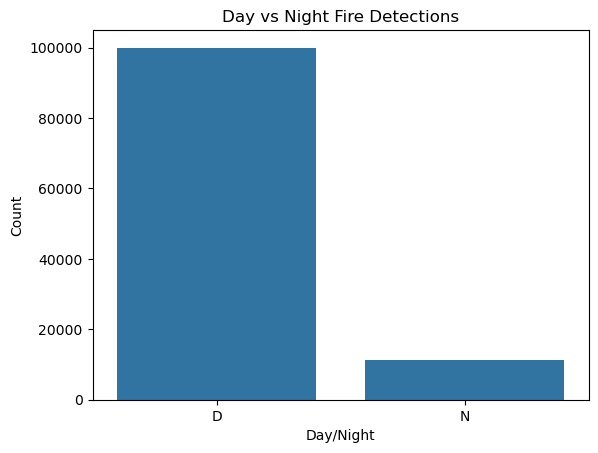

In [11]:
# Step 7: Count Day vs Night
sns.countplot(x='daynight', data=df)
plt.title("Day vs Night Fire Detections")
plt.xlabel("Day/Night")
plt.ylabel("Count")
plt.show()

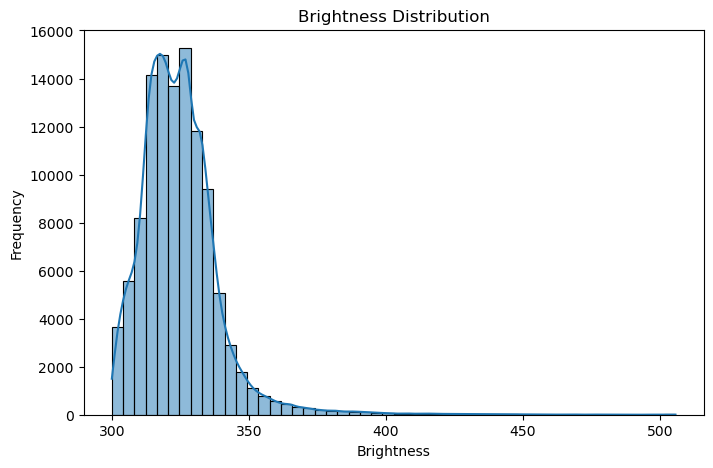

In [13]:
# Step 8: Brightness Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['brightness'], bins=50, kde=True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()

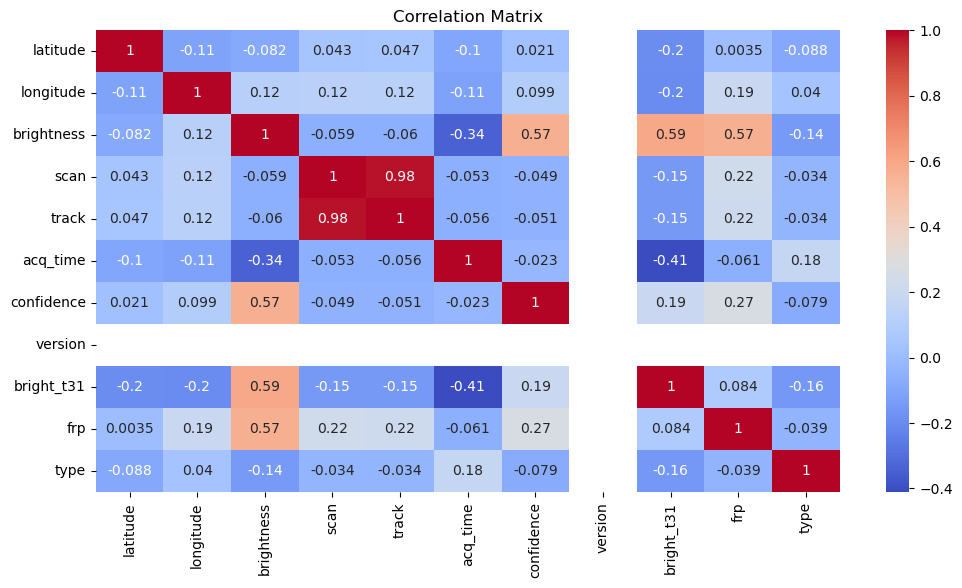

In [21]:
# Fix: Use only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [23]:
#  Step 10: Label Encode 'daynight'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['daynight_encoded'] = le.fit_transform(df['daynight'])

# Show encoded column
df[['daynight', 'daynight_encoded']].head()

,daynight,daynight_encoded
0,D,0
1,D,0
2,D,0
3,D,0
4,D,0


In [25]:
# Step 11: Save Cleaned Dataset (Optional)
df.to_csv("Week1_cleaned_dataset.csv", index=False)
print("✅ Preprocessed dataset saved.")

✅ Preprocessed dataset saved.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [5]:
# Load new dataset
df2 = pd.read_csv("6344ec94bb4449051550 (1).csv")
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [7]:
df2.info()
df2.describe()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81525 entries, 0 to 81524
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    81525 non-null  float64
 1   longitude   81525 non-null  float64
 2   brightness  81525 non-null  float64
 3   scan        81525 non-null  float64
 4   track       81525 non-null  float64
 5   acq_date    81525 non-null  object 
 6   acq_time    81525 non-null  int64  
 7   satellite   81525 non-null  object 
 8   instrument  81525 non-null  object 
 9   confidence  81525 non-null  int64  
 10  version     81525 non-null  float64
 11  bright_t31  81525 non-null  float64
 12  frp         81525 non-null  float64
 13  daynight    81525 non-null  object 
 14  type        81525 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 9.3+ MB


latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [9]:
df_encoded = pd.get_dummies(df2, drop_first=True)
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,...,acq_date_2022-12-24,acq_date_2022-12-25,acq_date_2022-12-26,acq_date_2022-12-27,acq_date_2022-12-28,acq_date_2022-12-29,acq_date_2022-12-30,acq_date_2022-12-31,satellite_Terra,daynight_N
0,30.1138,80.0756,300.0,1.2,1.1,511,7,6.03,288.4,7.1,...,False,False,False,False,False,False,False,False,True,False
1,23.7726,86.2078,306.1,1.6,1.2,512,62,6.03,293.5,10.4,...,False,False,False,False,False,False,False,False,True,False
2,22.2080,84.8627,304.8,1.4,1.2,512,42,6.03,293.3,5.8,...,False,False,False,False,False,False,False,False,True,False
3,23.7621,86.3946,306.9,1.6,1.2,512,38,6.03,295.2,9.3,...,False,False,False,False,False,False,False,False,True,False
4,23.6787,86.0891,303.6,1.5,1.2,512,52,6.03,293.1,7.2,...,False,False,False,False,False,False,False,False,True,False


In [15]:
# Step 1: Check your data columns
print("Available columns:\n", df_encoded.columns)

# Step 2: Define features and target safely
# We'll assume that the 'deforestation' column is your target
# If the column name is different, replace below with exact name
if 'deforestation' in df_encoded.columns:
    X = df_encoded.drop("deforestation", axis=1)
    y = df_encoded["deforestation"]
else:
    # Auto pick last column as target (backup plan)
    X = df_encoded.iloc[:, :-1]
    y = df_encoded.iloc[:, -1]

# Step 3: Import and split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train-test split successful!")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())

Available columns:
 Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp',
       ...
       'acq_date_2022-12-24', 'acq_date_2022-12-25', 'acq_date_2022-12-26',
       'acq_date_2022-12-27', 'acq_date_2022-12-28', 'acq_date_2022-12-29',
       'acq_date_2022-12-30', 'acq_date_2022-12-31', 'satellite_Terra',
       'daynight_N'],
      dtype='object', length=374)
✅ Train-test split successful!
X_train shape: (65220, 373)
y_train distribution:
 daynight_N
False    56853
True      8367
Name: count, dtype: int64


In [17]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_res))

Before SMOTE: [56853  8367]
After SMOTE: [56853 56853]


In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_res, y_res)

y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     14207
        True       1.00      1.00      1.00      2098

    accuracy                           1.00     16305
   macro avg       1.00      1.00      1.00     16305
weighted avg       1.00      1.00      1.00     16305



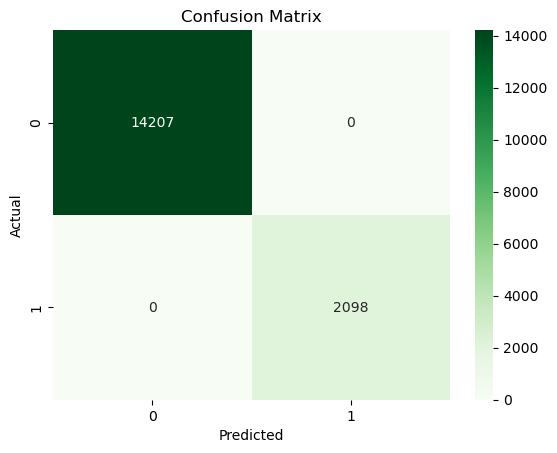

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Suppose we have 100 samples with 64x64 (4096) features
X = np.random.rand(100, 64 * 64)  # Random features
y = np.random.randint(0, 2, 100)  # 0 = Forest, 1 = Deforested

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.4
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.38      0.30      0.33        10

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.39        20
weighted avg       0.40      0.40      0.39        20

